In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import *
from scipy import integrate

In [2]:
# 第1题：计算宇宙微波背景辐射光深


Omega_m0 = 0.3   # 物质密度
Omega_A0 = 0.7   # 宇宙学常数
z1 = 6
z2 = 15
z0 = 1100

def H_rec(z):   # 积分内函数1/H（提出了H0）
    return 1/(( (Omega_m0*((1+z)**3)) + Omega_A0 )**0.5 )

tau1_1 = integrate.quad(H_rec, 0, z1)[0]
tau1_2 = integrate.quad(H_rec, z1, z0)[0]
print ('再电离红移为 6 时，光深第一部分：', tau1_1)
print ('再电离红移为 6 时，光深第二部分：', tau1_2)

tau2_1 = integrate.quad(H_rec, 0, z2)[0]
tau2_2 = integrate.quad(H_rec, z2, z0)[0]
print ('再电离红移为 15 时，光深第一部分：', tau2_1)
print ('再电离红移为 15 时，光深第二部分：', tau2_2)

再电离红移为 6 时，光深第一部分： 1.9256134921751398
再电离红移为 6 时，光深第二部分： 1.2694159694931226
再电离红移为 15 时，光深第一部分： 2.3922420355499243
再电离红移为 15 时，光深第二部分： 0.8027874261183381


1
金斯质量 M_J0： 1.8483057215243536e+23 kg
金斯质量 M_J0： 9.294740999845886e-08 m_sun
2
声速 c_s： 1172916.3797908132 m/s
临界密度 rho_c： 9.204177322338888e-27 kg/m^3
金斯质量 M_J0： 4.088107465056362e+47 kg
金斯质量 M_J0： 2.0558233210411418e+17 m_sun


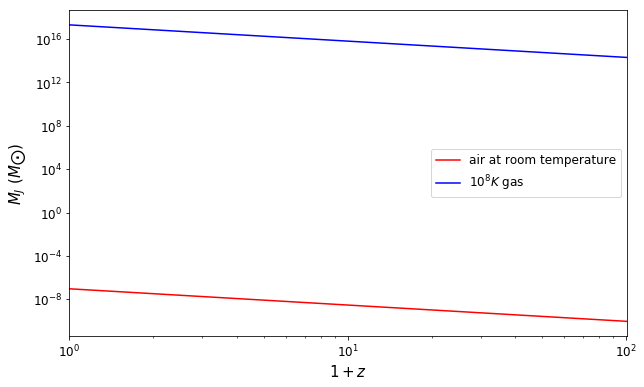

In [3]:
# 第3题：计算金斯质量

z = np.linspace(0,100,10001)

# 1 室温下空气
print ('1')

k_B = 1.38064852 * (10**(-23))  #玻尔兹曼常数(m^2 kg s^-2 K^-1)
T = 300 #(K)
rho_0 = 1.293  #(kg m^-3)
m_p = 1.6726219 * (10**(-27))  #质子质量(kg)
c_s = 340  #声速(m/s)
G = 6.67408 * (10**(-11))  #(m^3 kg^-1 s^-2)


M_J0 = (1/6) * (c_s**3) * (math.pi**2.5) * (G**(-1.5)) * (rho_0**(-0.5))
print ('金斯质量 M_J0：', M_J0, 'kg')
m_sun = 1.98855 * (10**30)  #太阳质量(kg)
M_J0 = M_J0/m_sun
print ('金斯质量 M_J0：', M_J0, 'm_sun')

M_J_1 = []
for i in range(len(z)):
    M_J_1.append(M_J0*((1+z[i])**(-1.5)))



# 2 10^8 K 气体
print ('2')

T = 10**8  #(K)
c_s = ((5*k_B*T)/(3*m_p))**0.5
print ('声速 c_s：', c_s, 'm/s')


H0 = 70
Mpc = 3.08567758 * (10**22)  #(m)
H0_m = H0 * 1000 / Mpc  #以米为单位的哈勃常数
rho_c = 3*(H0_m**2)/(8*math.pi*G)
print ('临界密度 rho_c：', rho_c, 'kg/m^3')

Omega_b0 = 0.0484
M_J0 = (1/6) * (c_s**3) * (math.pi**2.5) * (G**(-1.5)) * (rho_c**(-0.5)) * (Omega_b0**(-0.5))
print ('金斯质量 M_J0：', M_J0, 'kg')
m_sun = 1.98855 * (10**30)  #太阳质量(kg)
M_J0 = M_J0/m_sun
print ('金斯质量 M_J0：', M_J0, 'm_sun')

M_J_2 = []
for i in range(len(z)):
    M_J_2.append(M_J0*((1+z[i])**(-1.5)))

    
fig = plt.figure(figsize=(10, 6))
ax1=plt.subplot(111)
ax1.loglog()
ax1.plot(1+z, M_J_1, c='r', label=r'air at room temperature')
ax1.plot(1+z, M_J_2, c='b', label=r'$10^8 K$ gas')
ax1.set_xlabel(r'$1+z$',fontsize=15)
ax1.set_ylabel(r'$M_J\ (M_{\bigodot})$', fontsize=15)
ax1.set_xlim(1,101)
ax1.legend(fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

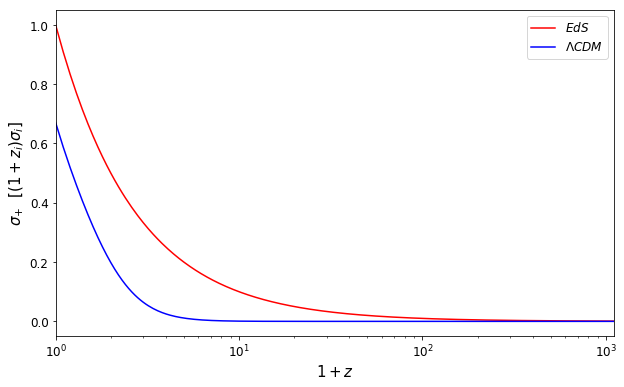

In [4]:
# 第4题：线性扰动增长随红移变化

z = np.linspace(0,1100,11001)
sigma_eds = []
sigma_acdm = [] 

Omega_m0 = 0.3
Omega_A0 = 0.8
Omega_r0 = 8.5*(10**-5)

def g(z):
    E = ((Omega_m0*((1+z)**3)) + (Omega_r0*((1+z)**4)) + Omega_A0)
    Omega_m = Omega_m0 * ((1+z)**3) / (E**2)
    Omega_A = Omega_A0 / (E**2)
    factor_2 = (Omega_m**(4/7) - Omega_A + ((1+Omega_m/2)*(1+Omega_A/70)))**(-1)
    return 2.5 * Omega_m * factor_2

for i in range(len(z)):
    sigma_eds.append((1+z[i])**(-1))
    sigma_acdm.append(((1+z[i])**(-1))*g(z[i]))
    

    
fig = plt.figure(figsize=(10, 6))
ax1=plt.subplot(111)
#ax1.loglog()
ax1.set_xscale('log')
ax1.plot(1+z, sigma_eds, c='r', label=r'$EdS$')
ax1.plot(1+z, sigma_acdm, c='b', label=r'$\Lambda CDM$')
ax1.set_xlabel(r'$1+z$',fontsize=15)
ax1.set_ylabel(r'$\sigma_{+}\ \ [(1+z_i)\sigma_i]$', fontsize=15)
ax1.set_xlim(1,1101)
ax1.legend(fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

In [5]:
# 第8题：计算引力波辐射强度及波长


m1 = 10**7  #(m_sun)
m2 = 3*(10**6)  #(m_sun)
q = m2/m1  #质量比
m_sun = 1.98855 * (10**30)  #太阳质量(kg)
G = 6.67408 * (10**(-11))  #(m^3 kg^-1 s^-2)
c = 3 * (10**8)  #(m/s)

a = 6 * G * m1 * m_sun / ((c**2) * 1.495978707 * (10**11))
print ('轨道长度a：', a, 'AU')

f = (5.7*(10**(-8))) * ((1+q)**0.5) * ((m1/(10**8))**0.5) * ((500/a)**1.5)
print ('辐射频率f：', f, 'Hz')

lamb = c/f
print ('辐射波长lambda：', lamb, 'm')

M = (q**0.6) * m1 / ((1+q)**0.2)
print ('啁啾质量M：', M, 'm_sun')

H0 = 70
z1 = 10
def H_rec(z):   # 积分内函数1/H
    return 1/(((1+z)**1.5)*H0)
d_c = integrate.quad(H_rec, 0, z1)[0]   # 共动距离
d_L = d_c * (1+z1)
print ('光度距离d_L：', d_L, 'Mpc')

f_r = f * (1+z1)
print ('f_r', f_r, 'Hz')


Mpc = 3.08567758 * (10**22)  #(m)
h = ((G*(1+z1)*M)/((c**2)*d_L)) * (math.pi*(1+z1)*M*f)
print ('幅度h：', h)

轨道长度a： 0.5914407614626562 AU
辐射频率f： 0.0005051666362482124 Hz
辐射波长lambda： 593863447174.678 m
啁啾质量M： 4607698.803829396 m_sun
光度距离d_L： 0.2195250059898658 Mpc
f_r 0.005556832998730336 Hz
幅度h： 1.3772188826662713e-14


In [6]:
G = 6.67408 * (10**(-11))  #(m^3 kg^-1 s^-2)
m = 6.2*(10**9)  #(m_sun)
Mpc = 3.08567758 * (10**22)  #(m)
m_sun = 1.98855 * (10**30)  #太阳质量(kg)
L = 16.9

a = G * m * m_sun / ((c**2) * L * Mpc)
print (a)


1.7532338774570474e-11
